- data 폴더에 있는 breast_cancer.csv 파일을 학습하고 breast_cancer_new.csv 파일의 데이터를 통해 악성과 양성을 예측하여 breast_cancer_result.csv 파일로 저장한다.
- 첫번째 은닉층의 노드는 60개
- 두번째 은닉층의 노드는 40개
- 세번째 은닉층의 노드는 20개
- 19번 예제를 참고하여 작업을 해준다.


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기중단을 위해 사용
from tensorflow.keras.callbacks import EarlyStopping

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


In [4]:
df1.info() # 문자열 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              454 non-null    float64
 1   mean texture             454 non-null    float64
 2   mean perimeter           454 non-null    float64
 3   mean area                454 non-null    float64
 4   mean smoothness          454 non-null    float64
 5   mean compactness         454 non-null    float64
 6   mean concavity           454 non-null    float64
 7   mean concave points      454 non-null    float64
 8   mean symmetry            454 non-null    float64
 9   mean fractal dimension   454 non-null    float64
 10  radius error             454 non-null    float64
 11  texture error            454 non-null    float64
 12  perimeter error          454 non-null    float64
 13  area error               454 non-null    float64
 14  smoothness error         4

In [5]:
df1.isna().sum() # 결측치 확인

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [7]:
# 문자열 데이터를 숫자로 변환한다.
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# 데이터 표준화 
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [9]:
# 모델 설정
model = Sequential()

a1 = X.shape[1]
model.add(Dense(60, input_dim=a1))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
# 학습 모델을 생성한다
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [11]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/20/{epoch}-{val_loss}.h5'
path2 = 'model/20/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience: 개선이 된 이후 몇 번을 더 볼 것인가를 설정.
# 이 횟수 동안 개선이 되지 않으면 중단.
call3 = EarlyStopping(monitor = 'val_loss', patience=50)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)


In [13]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=200000, batch_size=500, 
          validation_data=[X_test, y_test],
          callbacks=[call1, call2, call3])



Epoch 1/200000
1/1 [==============================] - 1s 1s/step - loss: 0.7584 - accuracy: 0.3581 - val_loss: 0.7132 - val_accuracy: 0.4615
Epoch 2/200000
1/1 [==============================] - 0s 72ms/step - loss: 0.7222 - accuracy: 0.4490 - val_loss: 0.6802 - val_accuracy: 0.6044
Epoch 3/200000
1/1 [==============================] - 0s 72ms/step - loss: 0.6893 - accuracy: 0.5813 - val_loss: 0.6507 - val_accuracy: 0.7143
Epoch 4/200000
1/1 [==============================] - 0s 76ms/step - loss: 0.6594 - accuracy: 0.6722 - val_loss: 0.6243 - val_accuracy: 0.7473
Epoch 5/200000
1/1 [==============================] - 0s 71ms/step - loss: 0.6324 - accuracy: 0.7548 - val_loss: 0.6000 - val_accuracy: 0.7692
Epoch 6/200000
1/1 [==============================] - 0s 72ms/step - loss: 0.6073 - accuracy: 0.7989 - val_loss: 0.5772 - val_accuracy: 0.8132
Epoch 7/200000
1/1 [==============================] - 0s 74ms/step - loss: 0.5836 - accuracy: 0.8347 - val_loss: 0.5553 - val_accuracy: 0.8242
E

Epoch 58/200000
1/1 [==============================] - 0s 81ms/step - loss: 0.0883 - accuracy: 0.9780 - val_loss: 0.1060 - val_accuracy: 0.9560
Epoch 59/200000
1/1 [==============================] - 0s 88ms/step - loss: 0.0863 - accuracy: 0.9780 - val_loss: 0.1051 - val_accuracy: 0.9560
Epoch 60/200000
1/1 [==============================] - 0s 89ms/step - loss: 0.0844 - accuracy: 0.9780 - val_loss: 0.1044 - val_accuracy: 0.9560
Epoch 61/200000
1/1 [==============================] - 0s 87ms/step - loss: 0.0825 - accuracy: 0.9780 - val_loss: 0.1037 - val_accuracy: 0.9560
Epoch 62/200000
1/1 [==============================] - 0s 89ms/step - loss: 0.0807 - accuracy: 0.9780 - val_loss: 0.1032 - val_accuracy: 0.9560
Epoch 63/200000
1/1 [==============================] - 0s 86ms/step - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.1026 - val_accuracy: 0.9560
Epoch 64/200000
1/1 [==============================] - 0s 94ms/step - loss: 0.0773 - accuracy: 0.9780 - val_loss: 0.1022 - val_accuracy:

Epoch 115/200000
1/1 [==============================] - 0s 28ms/step - loss: 0.0302 - accuracy: 0.9945 - val_loss: 0.1461 - val_accuracy: 0.9451
Epoch 116/200000
1/1 [==============================] - 0s 27ms/step - loss: 0.0296 - accuracy: 0.9945 - val_loss: 0.1477 - val_accuracy: 0.9451
Epoch 117/200000
1/1 [==============================] - 0s 28ms/step - loss: 0.0291 - accuracy: 0.9945 - val_loss: 0.1493 - val_accuracy: 0.9451
Epoch 118/200000
1/1 [==============================] - 0s 28ms/step - loss: 0.0286 - accuracy: 0.9945 - val_loss: 0.1509 - val_accuracy: 0.9451
Epoch 119/200000
1/1 [==============================] - 0s 28ms/step - loss: 0.0280 - accuracy: 0.9945 - val_loss: 0.1525 - val_accuracy: 0.9451
Epoch 120/200000
1/1 [==============================] - 0s 28ms/step - loss: 0.0275 - accuracy: 0.9945 - val_loss: 0.1541 - val_accuracy: 0.9451


In [14]:
# 모델을 복원한다.
model2 = load_model(path2)
model2

In [15]:
a1 = model2.evaluate(X_test, y_test) # 저장한 파일이 맞는지 확인
print(f'손실률 : {a1[0]}')
print(f'정확도 : {a1[1]}')

3/3 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9560
손실률 : 0.10121943056583405
정확도 : 0.9560439586639404


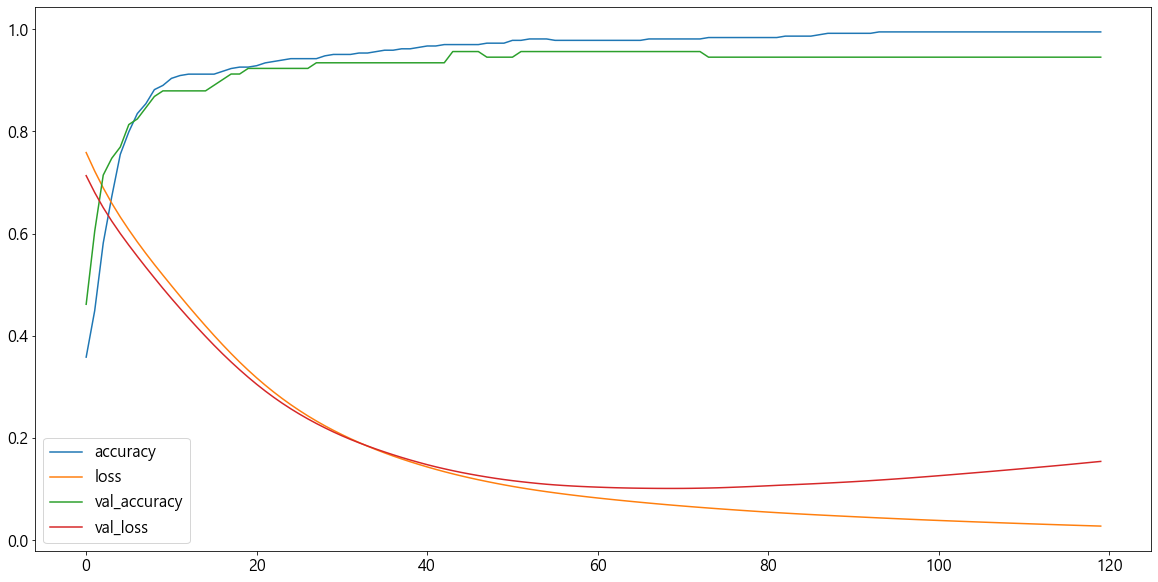

In [16]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [17]:
# 예측할 데이터 불러오기
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [22]:
# 데이터 표준화 
X2 = scaler1.transform(df2)
X2

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [23]:
# 학습 데이터를 통한 예측
result = model.predict(X2)
result

array([[1.87348807e-03],
       [9.22157824e-01],
       [5.31545937e-01],
       [3.33164841e-01],
       [8.48066211e-02],
       [1.23492081e-03],
       [9.99972463e-01],
       [1.00000000e+00],
       [1.27493456e-01],
       [7.49220781e-04],
       [4.78455191e-03],
       [3.56519893e-02],
       [1.25013351e-01],
       [1.28860454e-04],
       [9.99965429e-01],
       [4.81433004e-01],
       [4.45437676e-04],
       [1.72236741e-01],
       [1.39504485e-02],
       [1.74541995e-02],
       [5.38297754e-04],
       [2.78208498e-03],
       [1.19676031e-01],
       [4.08917549e-04],
       [1.12895831e-03],
       [9.97680783e-01],
       [3.25298915e-03],
       [2.88160350e-02],
       [1.59684625e-02],
       [1.18813692e-02],
       [2.52652556e-01],
       [7.82909687e-04],
       [6.06802441e-02],
       [9.99995589e-01],
       [8.91764835e-03],
       [9.24488902e-01],
       [3.44903618e-02],
       [6.16153739e-02],
       [9.98877823e-01],
       [3.41487321e-05],


In [25]:
# 예측된 결과를 0~1 사이로 맞춘다.
y_pred = (result > 0.5).astype('int32')
y_pred


array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [26]:
# 복원
pred2 = encoder1.inverse_transform(y_pred)
pred2


array(['benign', 'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malig

In [27]:
# 결과를 붙혀주고 저장한다.
df2['target'] = pred2
df2.to_csv('data/breast_cancer_result.csv', index=False)
